In [1]:
import tensorflow as tf
import numpy as np
import zipfile
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import cv2

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(train_data,train_labels), (test_data,test_labels) = mnist.load_data()
print(train_data.shape, test_data.shape)
print(train_labels.shape,test_labels.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [4]:
digits_data = np.vstack([train_data,test_data])
digits_label = np.hstack([train_labels,test_labels])

digits_data.shape
digits_label.shape


(70000,)

<Axes: ylabel='count'>

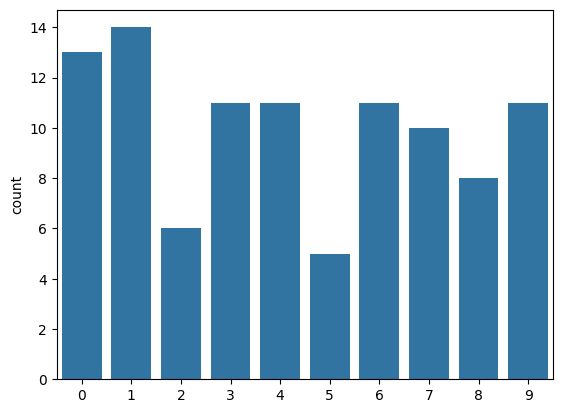

In [5]:
sns.countplot(x=digits_label[:100]) 

importing kaggle A/Z dataset

In [ ]:
# !curl -O https://iaexpert.academy/arquivos/alfabeto_A-Z.zip

In [ ]:
# zipObject = zipfile.ZipFile(file = "alfabeto_A-Z.zip",mode='r')
# zipObject.extractall('./')
# zipObject.close()

In [5]:
datasetAZ = pd.read_csv("A_Z Handwritten Data.csv").astype('float32')

In [ ]:
print(datasetAZ)

In [6]:
alphabetData = datasetAZ.drop(labels='0',axis=1)
alphabetLabels = datasetAZ['0']

In [7]:
print(alphabetData.shape,alphabetLabels.shape)

(372450, 784) (372450,)


In [9]:
print(alphabetLabels)
print(len(alphabetLabels))

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
372445    25.0
372446    25.0
372447    25.0
372448    25.0
372449    25.0
Name: 0, Length: 372450, dtype: float32
372450


In [7]:
alphabetData = np.reshape(alphabetData.values,(alphabetData.shape[0],28,28))

In [8]:
print(alphabetData.shape)

(372450, 28, 28)


Text(0.5, 1.0, 'CLASS: 0.0')

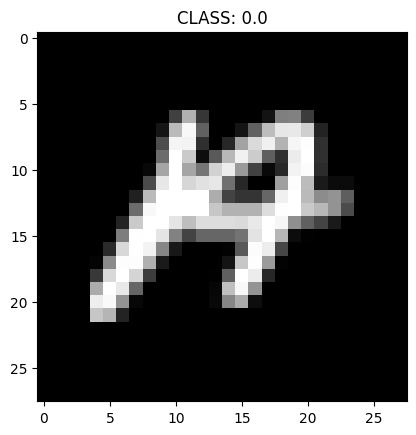

In [9]:
index = np.random.randint(0,alphabetData.shape[0])
plt.imshow(alphabetData[index],cmap='gray')
plt.title("CLASS: "+str(alphabetLabels[index]))

<Axes: xlabel='Alphabets Index', ylabel='count'>

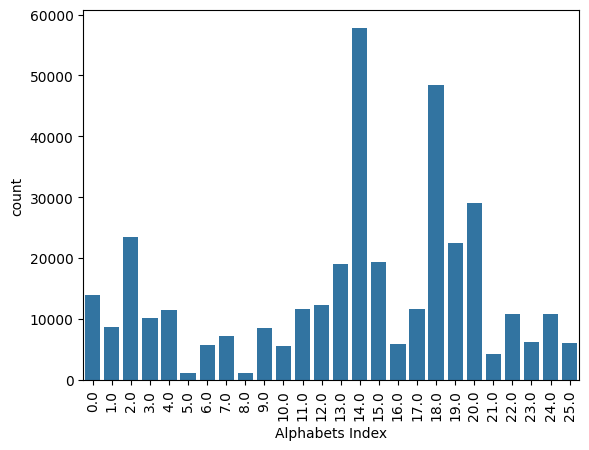

In [10]:
plt.xlabel("Alphabets Index")
plt.xticks(rotation=90)
sns.countplot(x=alphabetLabels[:len(alphabetLabels)] )


**JOINING THE DATASETS OF A to Z and numbers**

In [10]:
alphabetLabels = alphabetLabels +10

In [14]:
print(alphabetLabels)

0         10.0
1         10.0
2         10.0
3         10.0
4         10.0
          ... 
372445    35.0
372446    35.0
372447    35.0
372448    35.0
372449    35.0
Name: 0, Length: 372450, dtype: float32


**CONCATENATED alphabetData with digits_data and alphabetLabels with digits_label**

In [11]:
data = np.vstack([alphabetData,digits_data])
labels = np.hstack([alphabetLabels,digits_label])


In [49]:
print("DATA SHAPE :",data.shape,"LABEL SHAPE :",labels.shape)

DATA SHAPE : (442450, 28, 28) LABEL SHAPE : (442450,)


In [12]:
data = np.array(data,dtype='float32')

In [13]:
data = np.expand_dims(data,axis=-1)


In [51]:
print(data.shape)

(442450, 28, 28, 1)


In [55]:
print(data[0].min(),data[0].max())

0.0 255.0


In [14]:
data = data/255.0

In [57]:
print(data[0].min(),data[0].max())

0.0 1.0


In [61]:
print(np.unique(labels),"\n")
print(len(np.unique(labels)))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.] 

36


SOFTMAX one hot encoding

In [15]:
le = LabelBinarizer()
labels = le.fit_transform(labels)

In [20]:
print(labels)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [21]:
print(labels[0],len(labels[0]))

[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 36


Text(0.5, 1.0, '[0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]')

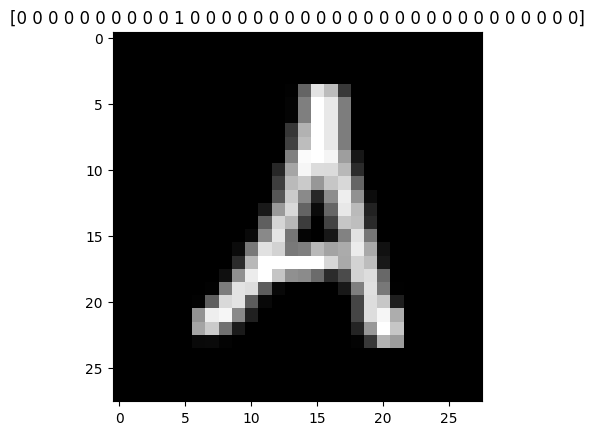

In [16]:
plt.imshow(data[10].reshape(28,28),cmap='gray')
plt.title(str(labels[10]))

In [17]:
classesTotal = labels.sum(axis=0)
print(classesTotal)

[ 6903  7877  6990  7141  6824  6313  6876  7293  6825  6958 13869  8668
 23409 10134 11440  1163  5762  7218  1120  8493  5603 11586 12336 19010
 57825 19341  5812 11566 48419 22495 29008  4182 10784  6272 10859  6076]


In [81]:
print(classesTotal.max())

57825


In [18]:
classesWeight = {}
for i in range(0,len(classesTotal)):
    # print(i)
    classesWeight[i] = classesTotal.max() / classesTotal[i]     #assigned weight
    print(classesWeight[i])

8.376792698826597
7.340992763742541
8.272532188841202
8.097605377398123
8.473769050410317
9.15967052114684
8.409685863874346
7.928835870012341
8.472527472527473
8.310577752227651
4.169370538611291
6.671089063221043
2.4702037677816224
5.7060390763765545
5.0546328671328675
49.72055030094583
10.035577924331829
8.011221945137157
51.629464285714285
6.808548216178029
10.320364090665715
4.990937338166753
4.6875
3.0418200946870066
1.0
2.989762680316426
9.94924294562973
4.999567698426422
1.1942625828703608
2.5705712380529007
1.993415609487038
13.827116212338593
5.362110534124629
9.21954719387755
5.3250759738465785
9.51695194206715


In [19]:
X_train,X_test,Y_train,Y_test = train_test_split(data,labels,test_size=0.2,random_state=1,stratify=labels)

In [ ]:
print(X_train.shape,X_test.shape)
print(X_train.shape, Y_train.shape)  # Check dimensions
print(type(X_train), type(Y_train))  # Ensuring that they are NumPy arrays or similar

(353960, 28, 28, 1) (88490, 28, 28, 1)
(353960, 28, 28, 1) (353960, 36)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [21]:
augmentation = ImageDataGenerator(rotation_range=10,zoom_range=0.05,width_shift_range=0.1,height_shift_range=0.1,horizontal_flip=False)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPool2D,Flatten,Dense
from tensorflow.keras.callbacks import ModelCheckpoint      #for saving the weights during training

In [23]:
network = Sequential()

network.add(Conv2D(filters = 32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='valid'))
network.add(MaxPool2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(64, activation = 'relu'))
network.add(Dense(128, activation = 'relu'))

network.add(Dense(36, activation='softmax'))

network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

c:\Users\bpst9\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:

network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        32,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 36)             │         4,644 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 138,468 (540.89 KB)

 Trainable params: 138,468 (540.89 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
name_labels = '0123456789' 
name_labels += 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
name_labels = [l for l in name_labels]

In [84]:
print(name_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [26]:
file_model = 'custom_ocr.keras'
epochs = 20
batch_size = 128

In [27]:
checkpointer = ModelCheckpoint(file_model, monitor = 'val_loss', verbose = 1, save_best_only=True)

In [28]:
steps = len(X_train) // batch_size

In [29]:
print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("Model input shape:", network.input_shape)
print("Model output shape:", network.output_shape)

X_train shape: (353960, 28, 28, 1)
Y_train shape: (353960, 36)
Model input shape: (None, 28, 28, 1)
Model output shape: (None, 36)


In [30]:
batch_x, batch_y = next(augmentation.flow(X_train, Y_train, batch_size=batch_size))
network.predict(batch_x)  # Ensure this works without error


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step 


array([[0.02837984, 0.02782541, 0.02611759, ..., 0.02685966, 0.02975283,
        0.02676378],
       [0.02845095, 0.02721784, 0.02664477, ..., 0.02665927, 0.02979046,
        0.02695675],
       [0.02830732, 0.02762281, 0.02664626, ..., 0.02699935, 0.02907315,
        0.02694635],
       ...,
       [0.02867281, 0.02763215, 0.02635734, ..., 0.02622958, 0.03049486,
        0.02678726],
       [0.02832071, 0.02798955, 0.02603183, ..., 0.02699752, 0.02946407,
        0.0274385 ],
       [0.02854335, 0.02738745, 0.02633453, ..., 0.02638102, 0.02981346,
        0.02689462]], dtype=float32)

In [38]:
history = network.fit(
    X_train, Y_train,
    validation_data=(X_test, Y_test),
    epochs=5,
    batch_size=batch_size
)


Epoch 1/5
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 98s 35ms/step - accuracy: 0.9923 - loss: 0.0232 - val_accuracy: 0.9856 - val_loss: 0.0592
Epoch 2/5
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 96s 35ms/step - accuracy: 0.9934 - loss: 0.0207 - val_accuracy: 0.9845 - val_loss: 0.0552
Epoch 3/5
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 107s 39ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9853 - val_loss: 0.0644
Epoch 4/5
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 169s 61ms/step - accuracy: 0.9936 - loss: 0.0192 - val_accuracy: 0.9873 - val_loss: 0.0547
Epoch 5/5
2766/2766 ━━━━━━━━━━━━━━━━━━━━ 101s 37ms/step - accuracy: 0.9940 - loss: 0.0182 - val_accuracy: 0.9861 - val_loss: 0.0627


In [32]:
for batch in augmentation.flow(X_train, Y_train, batch_size=batch_size):
    print(type(batch))  # Should be a tuple
    print(len(batch))   # Should be 2 (X, Y) or 3 (X, Y, sample weights)
    print(batch[0].shape, batch[1].shape)  # Check shapes
    print(batch[0].dtype, batch[1].dtype)  # Check data types
    break


<class 'tuple'>
2
(128, 28, 28, 1) (128, 36)
float32 int64


In [33]:
X_train = X_train.astype('float32')
Y_train = Y_train.astype('int64')  # Or `float32` for one-hot encoded labels


In [34]:
X_test.shape

(88490, 28, 28, 1)

In [36]:
predictions = network.predict(X_test, batch_size=batch_size)

692/692 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step
